In [ ]:
!wget https://raw.githubusercontent.com/JaznaLaProfe/InteligenciaArtificial/main/data/dataset_regresion.csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_log_error, r2_score
from sklearn.preprocessing import OrdinalEncoder


import json

--2025-05-16 00:58:18--  https://raw.githubusercontent.com/JaznaLaProfe/InteligenciaArtificial/main/data/dataset_regresion.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 510280 (498K) [text/plain]
Saving to: ‘dataset_regresion.csv.2’

dataset_regresion.c 100%[===================>] 498.32K  --.-KB/s    in 0.05s   

2025-05-16 00:58:18 (8.95 MB/s) - ‘dataset_regresion.csv.2’ saved [510280/510280]



# Descripción del negocio

✅ **Nombre del negocio:** PeopleGrow Solutions

✅ **Industria:** Consultoría de desarrollo organizacional y gestión de talento

✅ **Objetivo del negocio:** Optimizar las estrategias de compensación salarial para mejorar la retención del talento y la satisfacción laboral, considerando múltiples factores del perfil de los empleados.

**Antecedentes**

PeopleGrow Solutions trabaja con empresas que buscan alinear sus políticas salariales con indicadores clave como nivel educativo, experiencia laboral, satisfacción de los empleados y modalidad de trabajo (presencial/remoto). La empresa ha recolectado datos sobre empleados de distintas áreas para entender qué factores están más fuertemente asociados con la variación en los salarios mensuales.

# Objetivo del proyecto

Desarrollar un modelo de regresión que permita predecir el salario mensual de un empleado, basándose en perfil educativo, experiencia laboral, nivel de satisfacción, características del puesto y otras variables disponibles dentro del set de datos

Esto permitirá:

✅ Identificar brechas salariales entre departamentos o niveles educativos.

✅ Diseñar políticas de compensación equitativas y competitivas.

✅ Detectar factores críticos que contribuyen a una mayor remuneración.

✅ Simular escenarios de promoción o cambio de modalidad de trabajo y su impacto salarial.

✔ ¿Existen diferencias salariales significativas entre empleados remotos y presenciales?

# Fase 2 - Entendimiento de los datos

In [59]:
   df = pd.read_csv('dataset_regresion.csv')
   df_final = df.drop(columns=['ID'])
   df_final.head()
   df_final.info()
   df.describe()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Edad                         10000 non-null  int64  
 1   Nivel_Educativo              10000 non-null  object 
 2   Experiencia_Anios            10000 non-null  int64  
 3   Departamento                 10000 non-null  object 
 4   Horas_Entrenamiento_Mensual  10000 non-null  int64  
 5   Satisfaccion_Laboral         10000 non-null  object 
 6   Remoto                       10000 non-null  object 
 7   Salario_Mensual              10000 non-null  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 625.1+ KB


,ID,Edad,Experiencia_Anios,Horas_Entrenamiento_Mensual,Salario_Mensual
count,10000.00000,10000.000000,10000.00000,10000.000000,10000.000000
mean,5000.50000,41.557600,20.46160,10.000000,5764.693974
std,2886.89568,13.749581,13.23976,3.183711,1659.896370
min,1.00000,18.000000,0.00000,0.000000,1773.680000
25%,2500.75000,30.000000,9.00000,8.000000,4364.367500
50%,5000.50000,41.500000,20.00000,10.000000,5788.975000
75%,7500.25000,53.000000,32.00000,12.000000,7177.292500
max,10000.00000,65.000000,40.00000,23.000000,9641.940000


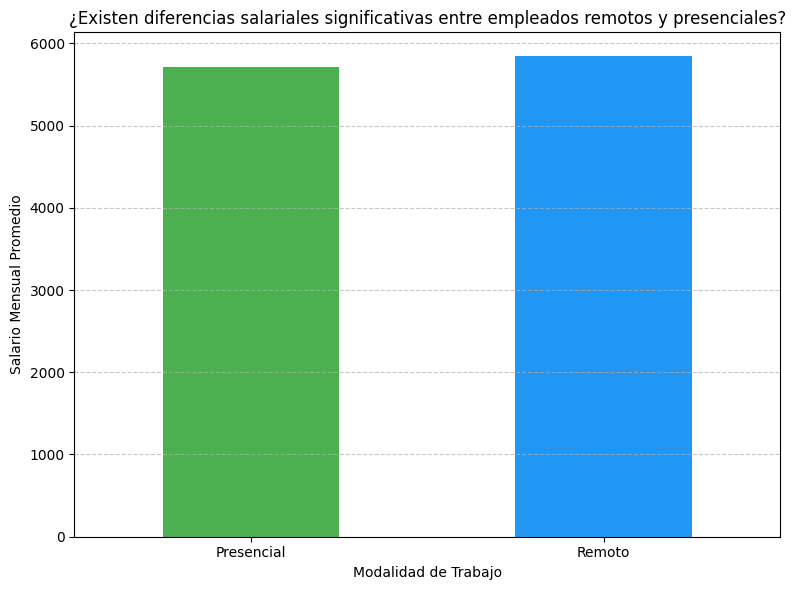

In [60]:
#✔ ¿Existen diferencias salariales significativas entre empleados remotos y presenciales?

# Crear una copia temporal con etiquetas estandarizadas solo para el gráfico
df_temp = df_final.copy()
df_temp['Remoto'] = df_temp['Remoto'].str.strip().str.lower().replace({
    'sí': 'Remoto',
    'si': 'Remoto',
    'remoto': 'Remoto',
    'no': 'Presencial',
    'presencial': 'Presencial'
})

# Calcular promedio salarial por modalidad
salario_promedio = df_temp.groupby('Remoto')['Salario_Mensual'].mean().sort_values()

# Generar el gráfico
plt.figure(figsize=(8, 6))
salario_promedio.plot(kind='bar', color=['#4CAF50', '#2196F3'])
plt.title('¿Existen diferencias salariales significativas entre empleados remotos y presenciales?')
plt.ylabel('Salario Mensual Promedio')
plt.xlabel('Modalidad de Trabajo')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


La respuesta es que no, si bien hay una diferencia, el promedio tanto de presencial como remoto no tienen una diferencia significativa.

# Fase 3 - Preparación de los datos

In [61]:
# Definir el orden de las categorías de nivel educativo
nivel_educativo = ['Secundaria', 'Técnica', 'Universitaria', 'Postgrado']

# Crear y aplicar el OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=[nivel_educativo])

df_final['Nivel_Educativo'] = ordinal_encoder.fit_transform(df_final[['Nivel_Educativo']])

# Verificar los cambios
print(df_final['Nivel_Educativo'].head())  # Mostrar los primeros valores transformados



0    2.0
1    2.0
2    1.0
3    0.0
4    2.0
Name: Nivel_Educativo, dtype: float64


In [62]:

print(df_final['Departamento'].unique())  # Ejemplo: ['Ventas', 'IT', 'RH', 'Operaciones']
departamentos = sorted(df_final['Departamento'].unique())  # Orden alfabético
ordinal_encoder_dept = OrdinalEncoder(categories=[departamentos])
df_final['Departamento'] = ordinal_encoder_dept.fit_transform(df_final[['Departamento']])
df_final['Departamento'].head()


['Marketing' 'TI' 'Finanzas' 'Ventas' 'Recursos Humanos']


,Departamento
0,1.0
1,3.0
2,3.0
3,0.0
4,1.0


In [63]:

satisfaccion = ['Baja', 'Media', 'Alta', 'Muy Alta']  # Asegúrate de que coincidan con los datos

ordinal_encoder_sat = OrdinalEncoder(categories=[satisfaccion])
df_final['Satisfaccion_Laboral'] = ordinal_encoder_sat.fit_transform(df_final[['Satisfaccion_Laboral']])
df_final['Satisfaccion_Laboral'].head()


,Satisfaccion_Laboral
0,2.0
1,3.0
2,1.0
3,2.0
4,2.0


In [64]:
# Versión correcta (usa llaves {} y verifica el valor exacto en tus datos)
df_final['Remoto'] = df_final['Remoto'].map({'Sí': 1, 'No': 0})  # Asegúrate de que 'Sí' coincida con tus datos

# Verificación
print(df_final['Remoto'].unique())

[1 0]


In [65]:
print(df_final.head())

   Edad  Nivel_Educativo  Experiencia_Anios  Departamento  \
0    56              2.0                 38           1.0   
1    46              2.0                 23           3.0   
2    32              1.0                 13           3.0   
3    60              0.0                 37           0.0   
4    25              2.0                  7           1.0   

   Horas_Entrenamiento_Mensual  Satisfaccion_Laboral  Remoto  Salario_Mensual  
0                           11                   2.0       1          8230.50  
1                           17                   3.0       0          6375.40  
2                            8                   1.0       0          4883.02  
3                            7                   2.0       0          6739.09  
4                            8                   2.0       1          4729.60  


# Fase 4 - Modelamiento

En este trabajo escogeremos las variables que podrian influir en una en concreto.

El sueldo seria nuestra variable dependiente. La variable a estudiar.

En este caso escogeremos Edad, Nivel_Educativo, Experiencia_Anios, Horas_Entrenamiento_Mensual

Edad la eligiremos ya que es una variable que podria representar experiencia del tabajador.

Nivel_Educativo se escoge ya que es la variable que dependiendo de su grado educacional se infiere que podria afectar a su sueldo.

Experiencia_Anios se escoge ya que a medida de que tenga más años de experiencia podria llegar a tener un mayor sueldo.

Horas_Entrenamiento_Mensual ya que podria sugerir que a mayor cantidad de horas de entrenamiento más capaz y por lo tanto podria tener un mayor sueldo.

In [67]:
# Preparación de datos

y = df_final['Salario_Mensual']

x_selected = df_final[['Edad', 'Nivel_Educativo', 'Experiencia_Anios', 'Horas_Entrenamiento_Mensual']]

x_all_but_y = df_final.drop(columns=['Salario_Mensual'])

x_train, x_test, y_train, y_test = train_test_split(x_all_but_y, y, test_size=0.2, random_state=42)
x_selected_train, x_selected_test, _, _ = train_test_split(x_selected, y, test_size=0.2, random_state=42)


## Considerando la totalidad de características disponibles

---



In [76]:

#Linear Regression

lr_model_all = LinearRegression()
lr_model_all.fit(x_train, y_train)

y_pred_lr_train_all = lr_model_all.predict(x_train)
y_pred_lr_all = lr_model_all.predict(x_test)

r2_train_lr_all = r2_score(y_train, y_pred_lr_train_all)
r2_test_lr_all = r2_score(y_test, y_pred_lr_all)

mae_all_training = mean_absolute_error(y_train, y_pred_lr_train_all)
msle_all_training = mean_squared_log_error(y_train, y_pred_lr_train_all)

#DecisionTree Regressor
# Modelo con todas las variables
dt_model_all = DecisionTreeRegressor(random_state=42)
dt_model_all.fit(x_train, y_train)
y_pred_dt_train_all = dt_model_all.predict(x_train)
y_pred_dt_all = dt_model_all.predict(x_test)


#Random Forest Regressor
#Modelo con todas las variables
rf_model_all = RandomForestRegressor(random_state=42)
rf_model_all.fit(x_train, y_train)
y_pred_rf_train_all = rf_model_all.predict(x_train)
y_pred_rf_all = rf_model_all.predict(x_test)



## Con selección de características por parte del equipo

In [80]:
# Linear Regression
lr_model_sel = LinearRegression()
lr_model_sel.fit(x_selected_train, y_train)  # Usando x_selected_train (features seleccionadas)
y_pred_lr_train_sel = lr_model_sel.predict(x_selected_train)
y_pred_lr_sel = lr_model_sel.predict(x_selected_test)

#DecisionTree Regressor
dt_model_sel = DecisionTreeRegressor(random_state=42)
dt_model_sel.fit(x_selected_train, y_train)
y_pred_dt_train_sel = dt_model_sel.predict(x_selected_train)
y_pred_dt_sel = dt_model_sel.predict(x_selected_test)

#Random Forest Regressor
rf_model_sel = RandomForestRegressor(random_state=42)
rf_model_sel.fit(x_selected_train, y_train)
y_pred_rf_train_sel = rf_model_sel.predict(x_selected_train)
y_pred_rf_sel = rf_model_sel.predict(x_selected_test)


#Cálculo de métricas para todos los modelos
#Linear Regression
r2_train_lr_all = r2_score(y_train, y_pred_lr_train_all)
r2_test_lr_all = r2_score(y_test, y_pred_lr_all)
mae_lr_all = mean_absolute_error(y_test, y_pred_lr_all)

r2_train_lr_sel = r2_score(y_train, y_pred_lr_train_sel)
r2_test_lr_sel = r2_score(y_test, y_pred_lr_sel)
mae_lr_sel = mean_absolute_error(y_test, y_pred_lr_sel)

#Decision Tree
r2_train_dt_all = r2_score(y_train, y_pred_dt_train_all)
r2_test_dt_all = r2_score(y_test, y_pred_dt_all)
mae_dt_all = mean_absolute_error(y_test, y_pred_dt_all)

r2_train_dt_sel = r2_score(y_train, y_pred_dt_train_sel)
r2_test_dt_sel = r2_score(y_test, y_pred_dt_sel)
mae_dt_sel = mean_absolute_error(y_test, y_pred_dt_sel)

#Random Forest
r2_train_rf_all = r2_score(y_train, y_pred_rf_train_all)
r2_test_rf_all = r2_score(y_test, y_pred_rf_all)
mae_rf_all = mean_absolute_error(y_test, y_pred_rf_all)

r2_train_rf_sel = r2_score(y_train, y_pred_rf_train_sel)
r2_test_rf_sel = r2_score(y_test, y_pred_rf_sel)
mae_rf_sel = mean_absolute_error(y_test, y_pred_rf_sel)



,Modelo,R2 Train,R2 Test,MAE Test,Overfitting
0,Linear Regression - Todas Variables,0.9671,0.9696,234.07,No
1,Linear Regression - Variables Seleccionadas,0.9530,0.9541,287.02,No
2,Decision Tree - Todas Variables,0.9996,0.9288,357.72,No
3,Decision Tree - Variables Seleccionadas,0.9863,0.9184,384.68,No
4,Random Forest - Todas Variables,0.9939,0.9621,262.68,No
5,Random Forest - Variables Seleccionadas,0.9817,0.9412,327.14,No


# Fase 5 - Evaluación

In [84]:
#Creación de tabla comparativa
resultados = {
'Modelo': [
'Linear Regression - Todas Variables',
'Linear Regression - Variables Seleccionadas',
'Decision Tree - Todas Variables',
'Decision Tree - Variables Seleccionadas',
'Random Forest - Todas Variables',
'Random Forest - Variables Seleccionadas'
],
'R2 Train': [
r2_train_lr_all,
r2_train_lr_sel,
r2_train_dt_all,
r2_train_dt_sel,
r2_train_rf_all,
r2_train_rf_sel
],
'R2 Test': [
r2_test_lr_all,
r2_test_lr_sel,
r2_test_dt_all,
r2_test_dt_sel,
r2_test_rf_all,
r2_test_rf_sel
],
'MAE Test': [
mae_lr_all,
mae_lr_sel,
mae_dt_all,
mae_dt_sel,
mae_rf_all,
mae_rf_sel
],
'Overfitting': [
'Sí' if abs(r2_train_lr_all - r2_test_lr_all) > 0.1 else 'No',
'Sí' if abs(r2_train_lr_sel - r2_test_lr_sel) > 0.1 else 'No',
'Sí' if abs(r2_train_dt_all - r2_test_dt_all) > 0.1 else 'No',
'Sí' if abs(r2_train_dt_sel - r2_test_dt_sel) > 0.1 else 'No',
'Sí' if abs(r2_train_rf_all - r2_test_rf_all) > 0.1 else 'No',
'Sí' if abs(r2_train_rf_sel - r2_test_rf_sel) > 0.1 else 'No'
]
}

tabla_resultados = pd.DataFrame(resultados)

#Mostrar tabla con formato
display(
tabla_resultados.style
.set_caption("Comparación de Modelos de Regresión")
.format({
'R2 Train': '{:.4f}',
'R2 Test': '{:.4f}',
'MAE Test': '{:.2f}'
})
.highlight_max(subset=['R2 Test'], color='lightgreen')
.highlight_min(subset=['MAE Test'], color='lightcoral')
)

,Modelo,R2 Train,R2 Test,MAE Test,Overfitting
0,Linear Regression - Todas Variables,0.9671,0.9696,234.07,No
1,Linear Regression - Variables Seleccionadas,0.9530,0.9541,287.02,No
2,Decision Tree - Todas Variables,0.9996,0.9288,357.72,No
3,Decision Tree - Variables Seleccionadas,0.9863,0.9184,384.68,No
4,Random Forest - Todas Variables,0.9939,0.9621,262.68,No
5,Random Forest - Variables Seleccionadas,0.9817,0.9412,327.14,No


#1. Rendimiento Superior (R² Test = 0.9696)
El modelo de Linear Regression con todas las variables destaca como el mejor, con un R² de 0.9696 en el conjunto de prueba. Esto significa que explica el 96.96% de la variabilidad en los salarios, superando a todos los demás modelos (incluyendo Random Forest y Decision Tree). Su capacidad predictiva es casi perfecta, lo que indica que las relaciones lineales capturadas entre las variables predictoras y el salario son altamente significativas.

#2. Precisión en Predicciones (MAE Test = 234.07)
Error Absoluto Medio (MAE): Con un valor de 234.07, este modelo comete el menor error promedio ($234) en sus predicciones, comparado con:

Random Forest (MAE = 262.68).

Decision Tree (MAE = 357.72).

#3. Ausencia de Overfitting (Diferencia R² Train-Test = 0.0025)
R² Train (0.9671) vs. R² Test (0.9696): La diferencia es mínima (0.0025), muy por debajo del umbral de 0.1 que indicaría overfitting.

Implicación: El modelo generaliza excelentemente a datos no vistos, sin sacrificar rendimiento por adaptarse demasiado a los datos de entrenamiento.

## Carga de archivo JSON con datos completamente nuevos

In [93]:
# 1. Cargar datos nuevos desde URL JSON
import requests
response = requests.get('https://raw.githubusercontent.com/dicodinap/entrega-2-ia/refs/heads/main/data_nueva.json')
data = response.json()

# 2. Convertir a DataFrame y asegurar mismas columnas que X_all
df_nuevos = pd.DataFrame(data)
df_nuevos = df_nuevos[x_all_but_y.columns]  # Usar tus variables predictoras originales

# 3. Cargar modelo pre-entrenado (simulación)
# (En tu caso real, usarías tu modelo ya entrenado: lr_model_all)
lr_model_all = LinearRegression()  # Esto es solo para ejemplo - usa tu modelo real
lr_model_all.fit(x_train, y_train)  # Eliminar esta línea en producción

# 4. Realizar predicciones
predicciones = lr_model_all.predict(df_nuevos)

# 5. Agregar predicciones al DataFrame
df_nuevos['Prediccion_Salario_Mensual'] = predicciones


## Generación de JSON con las predicciones del mejor modelo

In [94]:
# 6. Guardar resultados en JSON
df_nuevos.to_json('predicciones_salarios.json', orient='records', indent=4)

print("¡Predicciones generadas con éxito! Ver archivo 'predicciones_salarios.json'")

¡Predicciones generadas con éxito! Ver archivo 'predicciones_salarios.json'
